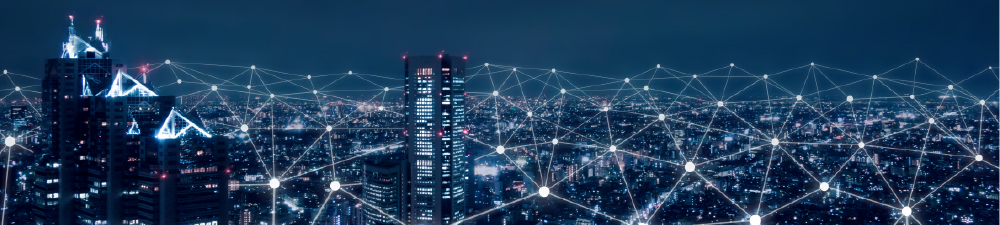

In [1]:
# check the total time to run entire jupyter notebook
import timeit
start_time = timeit.default_timer()

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import os
import math

from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
import scipy.stats as stats

# Import datetime modules
from datetime import datetime, timedelta
from time import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy.random as nr
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import linear_model
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)




## Reading data and initial processing

In [3]:
#edit the file location of raw data set
cust_df = pd.read_csv("Mini_project_3_Data2.csv")
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


## Exercise

## Placeholder for your analysis

In [4]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape
cust_df.info()

(51047, 58)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
# function to clean test data set by dropping duplicate rows, 
# rows with zero monthly revenue and 
# rows that is 'NaN' when columns has missing values percentage < 5%

def clean_round1(df):
    # dropping duplicate rows
    df.drop_duplicates(inplace = True, ignore_index = True)
    
    # drop rows with zero monthly revenue
    df.drop(df[df['MonthlyRevenue']== 0].index, inplace=True)
    df.reset_index(drop = True)
    
    # rows that is 'NaN' when columns has missing values percentage < 5%
    perct_missing_values = (((df.isnull() | df.isna()).sum()) / df.index.size)*100
        
    for i, v in enumerate(perct_missing_values):
        col = perct_missing_values.index[i]
        if v < 5:
            df.dropna(subset= [col], axis = 0, inplace = True) 
            df.reset_index(drop = True, inplace = True)
        else: 
            print('Columns with missing values percentage > 5% :', col)

    return df

In [6]:
# No dulpicated rows
cust_df[cust_df.duplicated()==True]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus


## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [7]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

# We have a total of 6 customers with zero montly revenue
cust_df[cust_df['MonthlyRevenue']== 0]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No


In [8]:
cust_df[cust_df['MonthlyRevenue']== 0].index

Int64Index([12262, 13127, 42051, 49920, 49946, 51035], dtype='int64')

In [9]:
cust_df.drop(cust_df[cust_df['MonthlyRevenue']== 0].index, inplace=True)
cust_df.reset_index(drop = True)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51036,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51037,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51038,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51039,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


### Q1.2 How many columns has missing values percentage > 5%

#### Calculate for each column % of missing value in the data
#### How many columns has missing values percentage > 5% 
* Answer: None

#### What strategy should be used for imputation? 
* Answer: Remove those rows that are NaN in those columns that have missing value ( percentage < 5% )

In [10]:
# There are no columns that has missing values > 5%
# We can drop those rows with columns < 5% missing values directly

perct_missing_values = (((cust_df.isnull() | cust_df.isna()).sum()) / cust_df.index.size)*100
perct_missing_values

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305637
MonthlyMinutes               0.305637
TotalRecurringCharge         0.305637
DirectorAssistedCalls        0.305637
OverageMinutes               0.305637
RoamingCalls                 0.305637
PercChangeMinutes            0.715111
PercChangeRevenues           0.715111
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [11]:
for i, v in enumerate(perct_missing_values):
    print(i)
    print(v)
    if v < 5:
        print('drop all NaN rows for column', perct_missing_values.index[i])
    else: 
        print('\n')

0
0.0
drop all NaN rows for column CustomerID
1
0.0
drop all NaN rows for column Churn
2
0.3056366450500578
drop all NaN rows for column MonthlyRevenue
3
0.3056366450500578
drop all NaN rows for column MonthlyMinutes
4
0.3056366450500578
drop all NaN rows for column TotalRecurringCharge
5
0.3056366450500578
drop all NaN rows for column DirectorAssistedCalls
6
0.3056366450500578
drop all NaN rows for column OverageMinutes
7
0.3056366450500578
drop all NaN rows for column RoamingCalls
8
0.7151113810466095
drop all NaN rows for column PercChangeMinutes
9
0.7151113810466095
drop all NaN rows for column PercChangeRevenues
10
0.0
drop all NaN rows for column DroppedCalls
11
0.0
drop all NaN rows for column BlockedCalls
12
0.0
drop all NaN rows for column UnansweredCalls
13
0.0
drop all NaN rows for column CustomerCareCalls
14
0.0
drop all NaN rows for column ThreewayCalls
15
0.0
drop all NaN rows for column ReceivedCalls
16
0.0
drop all NaN rows for column OutboundCalls
17
0.0
drop all NaN r

In [12]:
cust_df.dropna(axis = 0, inplace = True)
cust_df.reset_index(drop = True, inplace = True)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,No,0,Unknown,No,1-Highest,Other,Professional,No
49744,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
49745,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
49746,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

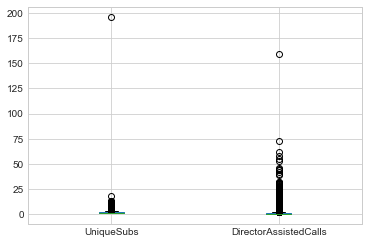

In [13]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [14]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

def one_perct_outliers(df, feature):
    
    bot1 = df[feature].quantile(.01)
    top1 = df[feature].quantile(.99)
    print('Bottom 1% outliers have values <=', bot1)
    print('Top 1% outliers have values >=', top1)

    # index = cust_df[(cust_df["DirectorAssistedCalls"] >= DirAssCalls_top1) | (cust_df["DirectorAssistedCalls"] <= DirAssCalls_bot1)].index
    # print('Total rows to drop:', index.size)

    index = df[(df[feature] >= top1)].index
    print('Total rows to drop for', feature, '(top 1%):', index.size)

    df.drop(df[df[feature] >= top1].index, inplace = True)
    # cust_df.drop(cust_df[cust_df["DirectorAssistedCalls"] <= DirAssCalls_bot1].index, inplace = True)
    df.reset_index(drop = True)
    
    return df

In [15]:
cust_df = one_perct_outliers(cust_df, "DirectorAssistedCalls")
cust_df = one_perct_outliers(cust_df, "UniqueSubs")
cust_df

Bottom 1% outliers have values <= 0.0
Top 1% outliers have values >= 9.65
Total rows to drop for DirectorAssistedCalls (top 1%): 499
Bottom 1% outliers have values <= 1.0
Top 1% outliers have values >= 5.0
Total rows to drop for UniqueSubs (top 1%): 605


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,No,0,Unknown,No,1-Highest,Other,Professional,No
49744,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
49745,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
49746,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


<AxesSubplot:>

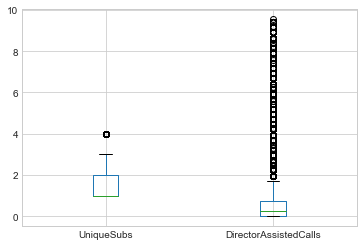

In [16]:
# Removed top 1% outliers
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

In [17]:
# 40% no churn, 60% churn
cust_df.groupby('Churn')['MonthlyRevenue'].count()

Churn
No     34702
Yes    13942
Name: MonthlyRevenue, dtype: int64

In [18]:
13942/34702

0.4017635871131347

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

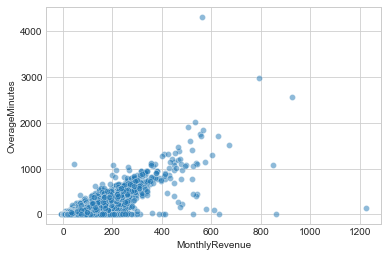

In [19]:
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df, alpha=0.5)

It is obvious that there are outliers in from the scatter plot and we can remove them so better understand the 'usual' relationship between them.

<AxesSubplot:xlabel='MonthlyRevenue'>

<AxesSubplot:xlabel='OverageMinutes'>

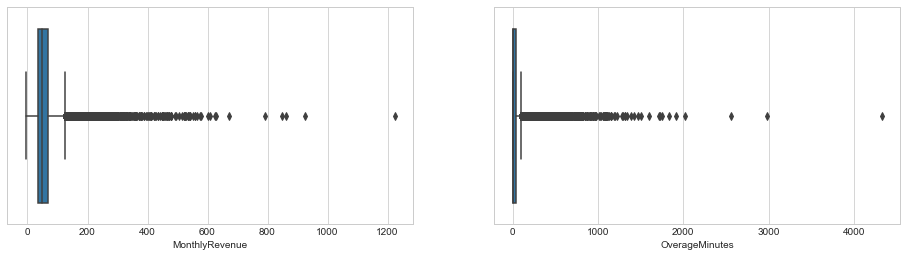

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(x=cust_df['MonthlyRevenue'], ax= ax[0])
sns.boxplot(x=cust_df['OverageMinutes'], ax= ax[1])

In [21]:
def rm_outliers(df, feature, upper_limit):
# IQR
    Q1 = np.percentile(df[feature], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[feature], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    print(IQR)

    # Above Upper bound
    upper = (Q3+1.5*IQR)
    upper_idx = df[df[feature] >= upper].index
    
    # Remove outliers based on scatter plot
    upper_limit_idx = df[df[feature] >= upper_limit].index

    print("Upper bound:",upper)
    print(np.where(upper))
    print(upper_idx)
    print('') 
    
    # Below Lower bound
    lower = (Q1-1.5*IQR)
    lower_idx = df[df[feature] <= lower].index

    print("Lower bound:", lower)
    print(np.where(lower))
    print(lower_idx)

    # df['MonthlyRevenue'][0]

    # ''' Removing the Outliers '''
#     df.drop(upper_idx, inplace = True)
#     df.drop(lower_idx, inplace = True)
#     df.reset_index(drop = True)

    df.drop(upper_limit_idx, inplace = True)
    df.reset_index(drop = True)
    
    return df

In [22]:
rm_outliers(cust_df, 'MonthlyRevenue', 700)
rm_outliers(cust_df, 'OverageMinutes', 2500)

36.324999999999996
Upper bound: 124.3325
(array([0], dtype=int64),)
Int64Index([   15,    33,    41,    45,    48,    50,    66,    72,    73,
               76,
            ...
            49535, 49537, 49559, 49595, 49673, 49685, 49691, 49711, 49723,
            49735],
           dtype='int64', length=2755)

Lower bound: -20.967499999999994
(array([0], dtype=int64),)
Int64Index([], dtype='int64')


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,No,0,Unknown,No,1-Highest,Other,Professional,No
49744,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
49745,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
49746,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


39.0
Upper bound: 97.5
(array([0], dtype=int64),)
Int64Index([   15,    26,    31,    33,    44,    48,    50,    62,    66,
               68,
            ...
            49690, 49691, 49696, 49708, 49711, 49713, 49723, 49735, 49740,
            49746],
           dtype='int64', length=5673)

Lower bound: -58.5
(array([0], dtype=int64),)
Int64Index([], dtype='int64')


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,No,0,Unknown,No,1-Highest,Other,Professional,No
49744,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
49745,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
49746,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

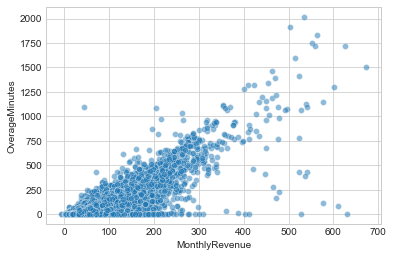

In [23]:
# After removing outliers
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df, alpha=0.5)

<AxesSubplot:xlabel='MonthlyRevenue'>

<AxesSubplot:xlabel='OverageMinutes'>

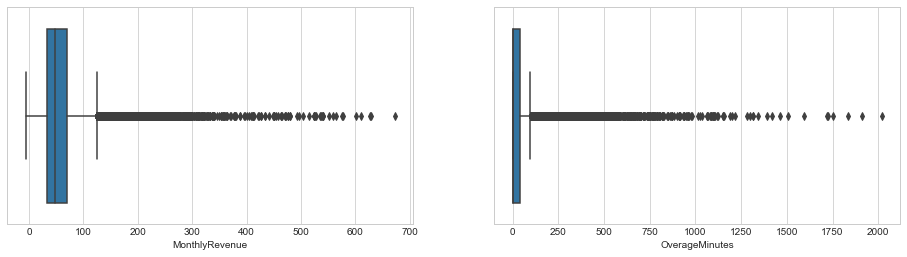

In [24]:
# After removing outliers
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(x=cust_df['MonthlyRevenue'], ax= ax[0])
sns.boxplot(x=cust_df['OverageMinutes'], ax= ax[1])

In [25]:
# pd.crosstab(cust_df.MonthlyRevenue, cust_df.OverageMinutes)
cust_df.groupby(['Churn']).agg({'MonthlyRevenue': ['mean'], 'OverageMinutes': ['mean']})

,MonthlyRevenue,OverageMinutes
,mean,mean
Churn,,
No,57.865231,36.804254
Yes,56.850481,40.591248


<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    
Interpretation: : Based on the scatter plot, customers with high overage minutes tend to have high revenue, it looks like a linear relationship but notice that majority of the customer spending USD200 (or any other amount towards bottom left hand side)  can take up a wide range from of overage minutes from 0 to 1000. They do not have a clear linear relationship. Another way of saying is let's say for the same overage minutes (bottom left), their monthly revenue can goes from 0 to approximately USD300, which can actually depends on other usage. 
    
Further more, it is obvious that after removing the outliers, relationship between 'OverageMinutes' and 'MonthlyRevenue' is pretty much a wide spread across.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

<AxesSubplot:xlabel='ActiveSubs'>

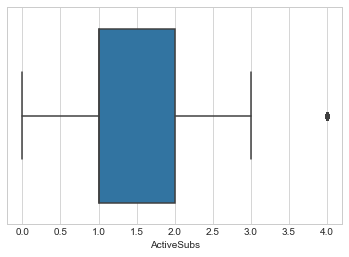

In [26]:
# No outliers in feature 'ActiveSubs'
sns.boxplot(x=cust_df['ActiveSubs'])

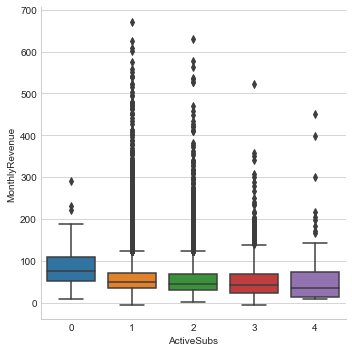

In [27]:
#use category plot to plot monthly revenue for each active subs category
# fig, ax = plt.subplots(figsize=(12, 10))
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df, kind= 'box') 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis

Interpretation: Yes, high number of active subscribers do lead to lower monthly revenue. Looking at their means value, majority of the active subscribers generally have the same monthly revenue, althougth there's a sudden surge in monthly revenue for 7 and 8 number of active subscribers.

### Q2.3 Does credit rating have an impact in churn rate?

In [28]:
pd.crosstab(cust_df['Churn'], cust_df['CreditRating'])
pd.crosstab(cust_df['Churn'], cust_df['CreditRating']).apply(lambda x: x / x.sum(), axis=0 )

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,5561,12848,5560,3820,4839,624,1446
Yes,2474,5516,2470,1325,1349,224,582


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.692097,0.69963,0.692403,0.742468,0.781997,0.735849,0.713018
Yes,0.307903,0.30037,0.307597,0.257532,0.218003,0.264151,0.286982


In [29]:
cust_df.groupby(['CreditRating','Churn']).size()

CreditRating  Churn
1-Highest     No        5561
              Yes       2474
2-High        No       12848
              Yes       5516
3-Good        No        5560
              Yes       2470
4-Medium      No        3820
              Yes       1325
5-Low         No        4839
              Yes       1349
6-VeryLow     No         624
              Yes        224
7-Lowest      No        1446
              Yes        582
dtype: int64

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.692097,0.69963,0.692403,0.742468,0.781997,0.735849,0.713018
Yes,0.307903,0.30037,0.307597,0.257532,0.218003,0.264151,0.286982


<AxesSubplot:xlabel='Churn'>

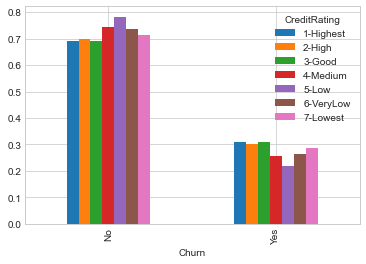

In [30]:
Cr_vs_Churn = pd.crosstab(cust_df['Churn'], cust_df['CreditRating']).apply(lambda x: x / x.sum(), axis=0 )
Cr_vs_Churn
Cr_vs_Churn.plot.bar()

In [31]:
for col in cust_df.columns:
    print('{}: {} unique values'.format(col, cust_df[col].nunique()))
    print('Unique values are: ', pd.unique(cust_df[col]), '\n')

CustomerID: 48638 unique values
Unique values are:  [3000002 3000010 3000014 ... 3399942 3399946 3399974] 

Churn: 2 unique values
Unique values are:  ['Yes' 'No'] 

MonthlyRevenue: 12134 unique values
Unique values are:  [ 24.    16.99  38.   ...  27.11 122.   534.93] 

MonthlyMinutes: 2602 unique values
Unique values are:  [ 219.   10.    8. ... 3141. 4719. 2437.] 

TotalRecurringCharge: 199 unique values
Unique values are:  [ 22.  17.  38.  75.  52.  30.  66.  35.  25.  37.  60.  70. 100.  50.
  55.  68.  20.  45. 150.  85.  83.  19.  71.  15.  58.  89.  95.  78.
  80.  77. 183.  87.  27. 108.  32.  59.   5.  40.  10. 105. 107.  74.
 102. 140.  63.  93.  49.  48.  81.  57.  24.  21.  47.  97.  82.  42.
  36.  76.   7. 200. 207.  31. 115.  92. 101.  91. 160.  90.  62.  56.
 121.  99.   8.   9.  79.  67. 110.  73.  84.  65.  43.  61. 120.  18.
  53.  12.  64.  11.  41.  44.  86.  88. 210.  54.  13.  29.  34. 155.
  98. 281.  28.  46. 175.  51. 117. 138.  16. 170.  39. 103.  72. 338.
 

Unique values are:  ['No' 'Yes'] 

RVOwner: 2 unique values
Unique values are:  ['No' 'Yes'] 

Homeownership: 2 unique values
Unique values are:  ['Known' 'Unknown'] 

BuysViaMailOrder: 2 unique values
Unique values are:  ['Yes' 'No'] 

RespondsToMailOffers: 2 unique values
Unique values are:  ['Yes' 'No'] 

OptOutMailings: 2 unique values
Unique values are:  ['No' 'Yes'] 

NonUSTravel: 2 unique values
Unique values are:  ['No' 'Yes'] 

OwnsComputer: 2 unique values
Unique values are:  ['Yes' 'No'] 

HasCreditCard: 2 unique values
Unique values are:  ['Yes' 'No'] 

RetentionCalls: 5 unique values
Unique values are:  [1 0 3 2 4] 

RetentionOffersAccepted: 4 unique values
Unique values are:  [0 1 2 3] 

NewCellphoneUser: 2 unique values
Unique values are:  ['No' 'Yes'] 

NotNewCellphoneUser: 2 unique values
Unique values are:  ['No' 'Yes'] 

ReferralsMadeBySubscriber: 12 unique values
Unique values are:  [ 0  1  2  3  4  7  5  6 16 11  8  9] 

IncomeGroup: 10 unique values
Unique values 

## Map unique values (categorical) into their ordinal/ nominal

In [32]:
# total 15 features with categories: Yes and No
cust_cat = cust_df[['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
                    'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel',
                    'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
                    'MadeCallToRetentionTeam']]
cust_cat

# Run the yes_no_map function
# yes_no_map(cust_cat)

yes_no_num = {'Yes': 1, 'No': 0}

for i in cust_cat.columns:

    cust_df[i] = cust_df[i].map(yes_no_num)
        

cust_df[['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
                    'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel',
                    'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
                    'MadeCallToRetentionTeam']]

cust_df

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam
0,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes
1,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No
2,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No
3,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,No,No,No
4,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
49744,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
49745,No,No,No,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
49746,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No


,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam
0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1
1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
4,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
49744,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
49745,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
49746,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,30,1,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,30,0,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,Unknown,0,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,10,0,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,10,0,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,0,0,Unknown,0,1-Highest,Other,Professional,No
49744,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,Unknown,0,3-Good,Other,Other,Yes
49745,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,Unknown,0,1-Highest,Other,Professional,Unknown
49746,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,0,0,30,0,5-Low,Other,Professional,Yes


In [33]:
# def cat_map(cust_df):
cust_df

# Map other features with categorical data

CreditRating_num = {'1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4, '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7}
cust_df['CreditRating'] = cust_df['CreditRating'].map(CreditRating_num)

PrizmCode_num = {'Suburban': 1, 'Town': 2, 'Rural': 3, 'Other': 4}
cust_df['PrizmCode'] = cust_df['PrizmCode'].map(PrizmCode_num)

known_unknown_num = {'Known': 1, 'Unknown': 0}
cust_df['Homeownership'] = cust_df['Homeownership'].map(known_unknown_num)

Occupation_num = {'Professional': 0, 'Crafts': 1, 'Other': 2, 'Self': 3, 'Retired': 4, 'Homemaker': 5, 'Clerical': 6, 'Student': 7}
cust_df['Occupation'] = cust_df['Occupation'].map(Occupation_num)

Marital_num = {'Yes': 1, 'No': 0, 'Unknown': 2}
cust_df['MaritalStatus'] = cust_df['MaritalStatus'].map(Marital_num)

cust_df
#     return cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,30,1,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,30,0,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,Unknown,0,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,10,0,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,10,0,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,0,0,Unknown,0,1-Highest,Other,Professional,No
49744,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,Unknown,0,3-Good,Other,Other,Yes
49745,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,Unknown,0,1-Highest,Other,Professional,Unknown
49746,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,0,0,30,0,5-Low,Other,Professional,Yes


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,30,1,1,1,0,0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,30,0,4,1,0,1
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,Unknown,0,3,2,1,1
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,10,0,4,4,2,0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,10,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,0,0,Unknown,0,1,4,0,0
49744,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,Unknown,0,3,4,2,1
49745,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,Unknown,0,1,4,0,2
49746,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,0,0,30,0,5,4,0,1


In [34]:
# Before labelencoder
cust_df['Churn'].head()

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
cust_df['Churn'] = labelencoder.fit_transform(cust_df['Churn'])
cust_df['Churn'].head()

0    Yes
1    Yes
2     No
3     No
4    Yes
Name: Churn, dtype: object

0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int32

In [35]:
cust_df.to_csv('cust_df_catClean.csv', index=False)

In [36]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,30,1,1,1,0,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,30,0,4,1,0,1
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,Unknown,0,3,2,1,1
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,10,0,4,4,2,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,10,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,1,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,0,0,Unknown,0,1,4,0,0
49744,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,Unknown,0,3,4,2,1
49745,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,Unknown,0,1,4,0,2
49746,3399946,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,0,0,30,0,5,4,0,1


In [37]:
cust_df.groupby('HandsetPrice').sum()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
HandsetPrice,,,,,,,,,,,,,,,,,,,,,
10,5652491508,480,111399.55,1031562.0,86501.0,1535.33,76663.0,1800.9,-21267.0,-3164.0,...,420,114,7741,27,303,103,5165,4930,3364,1989
100,3725989432,314,89602.85,986028.0,64869.0,1328.22,72640.0,1907.2,-4788.0,-4248.2,...,165,115,4592,23,113,76,3882,3236,2165,1329
130,6346299678,502,144750.70,1601966.0,109232.0,2285.23,110751.0,2428.4,-26036.0,-2995.1,...,266,128,7580,22,125,95,6653,5834,3618,2265
150,12531597972,1042,277025.90,2766508.0,206131.0,3933.76,216352.0,5810.4,-9159.0,-4471.8,...,559,243,16185,53,205,168,12438,10781,7085,4454
180,23089446,1,397.50,3051.0,282.0,3.72,262.0,5.6,34.0,-59.2,...,1,1,26,0,0,0,26,23,19,7
200,3757039828,323,94537.16,1031941.0,69807.0,1460.68,75823.0,2285.8,-21378.0,-5513.0,...,186,86,4701,17,66,67,3764,3339,2176,1368
240,9376650,0,395.31,3197.0,200.0,4.46,322.0,23.0,1384.0,159.2,...,1,0,11,0,0,1,11,9,6,2
250,63680492,9,1796.26,21441.0,1202.0,21.57,1484.0,1.5,-2803.0,-250.0,...,4,0,60,0,2,2,66,58,32,30
30,21756107352,1868,417885.05,3598280.0,323940.0,5692.99,288147.0,6822.7,-29226.0,-6064.5,...,1475,291,32471,105,932,344,18475,18556,12514,7392


### Imblance between classes to be rectified

Imblearn Technique that is mainly used in these types of situations. Imblearn techniques help to either upsample the minority class or downsample the majority class to match the equal proportion. 

In Upsampling synthetic data is generated for the minority class to match the ratio with the majority class whereas in downsampling we reduce the majority class data points to match it to the minority class.

We will be doing upsampling for class_1 (label = 1).

In [38]:
cust_df['Churn'].value_counts()

0    34698
1    13940
Name: Churn, dtype: int64

In [39]:
class_0 = cust_df[cust_df['Churn'] == 0]
class_1 = cust_df[cust_df['Churn'] == 1]

In [40]:
class_count_0, class_count_1 = cust_df['Churn'].value_counts()

In [41]:
class_count_0

34698

In [42]:
class_count_1

13940

In [43]:
class_1_over = class_1.sample(class_count_0, replace=True)

In [44]:
cust_df_over = pd.concat([class_1_over, class_0], axis=0)
cust_df_over

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
14901,3119446,1,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,...,0,3,0,0,200,0,2,4,2,2
49284,3395418,1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,...,0,5,0,0,150,0,1,4,2,0
8343,3067286,1,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,...,0,9,0,0,Unknown,0,1,1,2,0
12405,3099834,1,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,...,0,7,0,0,30,0,2,2,0,0
26643,3214634,1,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,...,0,0,0,0,Unknown,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49740,3399870,0,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,...,0,2,0,1,80,0,3,4,2,0
49742,3399878,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,...,0,3,0,0,30,1,1,2,2,2
49744,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,Unknown,0,3,4,2,1
49745,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,Unknown,0,1,4,0,2


In [45]:
cust_df_original = cust_df.copy()
cust_df_original

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,30,1,1,1,0,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,30,0,4,1,0,1
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,Unknown,0,3,2,1,1
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,10,0,4,4,2,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,10,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49743,3399882,1,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,0,0,Unknown,0,1,4,0,0
49744,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,Unknown,0,3,4,2,1
49745,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,Unknown,0,1,4,0,2
49746,3399946,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,0,0,30,0,5,4,0,1


In [46]:
cust_df = cust_df_over.copy()
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
14901,3119446,1,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,...,0,3,0,0,200,0,2,4,2,2
49284,3395418,1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,...,0,5,0,0,150,0,1,4,2,0
8343,3067286,1,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,...,0,9,0,0,Unknown,0,1,1,2,0
12405,3099834,1,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,...,0,7,0,0,30,0,2,2,0,0
26643,3214634,1,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,...,0,0,0,0,Unknown,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49740,3399870,0,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,...,0,2,0,1,80,0,3,4,2,0
49742,3399878,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,...,0,3,0,0,30,1,1,2,2,2
49744,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,Unknown,0,3,4,2,1
49745,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,Unknown,0,1,4,0,2


<mark>__Result:__
    
Type your interpretation here based on the analysis above

### Placeholder for additional exploratory analysis

In [47]:
#type your code here for any additional exploratory analysis (if any)



## Q3. Create additional features to help predict churn

In [48]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df

    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    
    # fill cell with'NaN' (division by '0') with 0
    cust_df['perc_overage_minutes']= (cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']).fillna(0)
    idx = cust_df[cust_df['perc_overage_minutes'].isnull() == True].index

#     print(idx) #print the list of index where cell is 'NaN' (only have values when there is no 'fillna(0)')
#     cust_df['perc_overage_minutes'][idx] = 0
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df, idx  



In [49]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df, idx =create_features(cust_df)
print(idx)
cust_df

Int64Index([], dtype='int64')


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
14901,3119446,1,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,...,0,200,0,2,4,2,2,1.0,0.617538,0.211864
49284,3395418,1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,...,0,150,0,1,4,2,0,1.0,0.970285,0.000000
8343,3067286,1,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,...,0,Unknown,0,1,1,2,0,1.0,0.838223,0.112000
12405,3099834,1,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,...,0,30,0,2,2,0,0,1.0,0.409213,0.183718
26643,3214634,1,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,...,0,Unknown,0,2,1,2,2,1.0,0.983607,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49740,3399870,0,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,...,1,80,0,3,4,2,0,1.0,0.632378,0.170648
49742,3399878,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,...,0,30,1,1,2,2,2,1.0,0.851703,0.000000
49744,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,Unknown,0,3,4,2,1,1.0,0.532581,0.682540
49745,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,Unknown,0,1,4,0,2,1.0,0.972357,0.005525


In [50]:
cust_df.to_csv('cust_df_new_feat.csv', index=False)

In [51]:
cust_df = pd.read_csv('cust_df_new_feat.csv') # read back here
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3119446,1,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,...,0,200,0,2,4,2,2,1.0,0.617538,0.211864
1,3395418,1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,...,0,150,0,1,4,2,0,1.0,0.970285,0.000000
2,3067286,1,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,...,0,Unknown,0,1,1,2,0,1.0,0.838223,0.112000
3,3099834,1,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,...,0,30,0,2,2,0,0,1.0,0.409213,0.183718
4,3214634,1,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,...,0,Unknown,0,2,1,2,2,1.0,0.983607,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69391,3399870,0,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,...,1,80,0,3,4,2,0,1.0,0.632378,0.170648
69392,3399878,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,...,0,30,1,1,2,2,2,1.0,0.851703,0.000000
69393,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,Unknown,0,3,4,2,1,1.0,0.532581,0.682540
69394,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,Unknown,0,1,4,0,2,1.0,0.972357,0.005525


In [52]:
# Create new df for new feature created
new_feat = cust_df[['perc_active_subs', 'perc_recurrent_charge', 'perc_overage_minutes']]
new_feat

,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,1.0,0.617538,0.211864
1,1.0,0.970285,0.000000
2,1.0,0.838223,0.112000
3,1.0,0.409213,0.183718
4,1.0,0.983607,0.000000
...,...,...,...
69391,1.0,0.632378,0.170648
69392,1.0,0.851703,0.000000
69393,1.0,0.532581,0.682540
69394,1.0,0.972357,0.005525


In [53]:
# Create new df for columns that are used to create 'new features'
used_for_creating_newFeature = cust_df[['ActiveSubs', 'UniqueSubs', 'TotalRecurringCharge', 'MonthlyRevenue', 'OverageMinutes', 'MonthlyMinutes']]
used_for_creating_newFeature

,ActiveSubs,UniqueSubs,TotalRecurringCharge,MonthlyRevenue,OverageMinutes,MonthlyMinutes
0,1,1,30.0,48.58,50.0,236.0
1,2,2,32.0,32.98,0.0,328.0
2,1,1,30.0,35.79,14.0,125.0
3,1,1,35.0,85.53,167.0,909.0
4,1,1,30.0,30.50,0.0,85.0
...,...,...,...,...,...,...
69391,1,1,45.0,71.16,100.0,586.0
69392,1,1,17.0,19.96,0.0,14.0
69393,1,1,17.0,31.92,43.0,63.0
69394,1,1,70.0,71.99,4.0,724.0


In [54]:
# list of features that seem to be less informative/ repeated (might be removed)

lessRelated_feat = cust_df[['CustomerID', 'ServiceArea', 'HandsetPrice']]
lessRelated_feat

,CustomerID,ServiceArea,HandsetPrice
0,3119446,MIAMIA305,200
1,3395418,LAXVNY818,150
2,3067286,NYCBRO917,Unknown
3,3099834,LOULEX606,30
4,3214634,NNYALB518,Unknown
...,...,...,...
69391,3399870,LAXOAK805,80
69392,3399878,LAXRIV909,30
69393,3399906,NEVENC760,Unknown
69394,3399942,LAXVNY818,Unknown


In [55]:
remove_lessImpt_newCreate = pd.concat([lessRelated_feat, new_feat], axis=1)
# remove_lessImpt_newCreate = lessRelated_feat.merge(new_feat, how='left', on='CustomerID')
remove_lessImpt_newCreate

,CustomerID,ServiceArea,HandsetPrice,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3119446,MIAMIA305,200,1.0,0.617538,0.211864
1,3395418,LAXVNY818,150,1.0,0.970285,0.000000
2,3067286,NYCBRO917,Unknown,1.0,0.838223,0.112000
3,3099834,LOULEX606,30,1.0,0.409213,0.183718
4,3214634,NNYALB518,Unknown,1.0,0.983607,0.000000
...,...,...,...,...,...,...
69391,3399870,LAXOAK805,80,1.0,0.632378,0.170648
69392,3399878,LAXRIV909,30,1.0,0.851703,0.000000
69393,3399906,NEVENC760,Unknown,1.0,0.532581,0.682540
69394,3399942,LAXVNY818,Unknown,1.0,0.972357,0.005525


In [56]:
# features to be remove from 'X' features

# remove_feat = lessRelated_feat.copy()
remove_feat = pd.concat([lessRelated_feat, used_for_creating_newFeature], axis=1)
# remove_feat = lessRelated_feat.merge(used_for_creating_newFeature, how='left', on='CustomerID')
remove_feat

,CustomerID,ServiceArea,HandsetPrice,ActiveSubs,UniqueSubs,TotalRecurringCharge,MonthlyRevenue,OverageMinutes,MonthlyMinutes
0,3119446,MIAMIA305,200,1,1,30.0,48.58,50.0,236.0
1,3395418,LAXVNY818,150,2,2,32.0,32.98,0.0,328.0
2,3067286,NYCBRO917,Unknown,1,1,30.0,35.79,14.0,125.0
3,3099834,LOULEX606,30,1,1,35.0,85.53,167.0,909.0
4,3214634,NNYALB518,Unknown,1,1,30.0,30.50,0.0,85.0
...,...,...,...,...,...,...,...,...,...
69391,3399870,LAXOAK805,80,1,1,45.0,71.16,100.0,586.0
69392,3399878,LAXRIV909,30,1,1,17.0,19.96,0.0,14.0
69393,3399906,NEVENC760,Unknown,1,1,17.0,31.92,43.0,63.0
69394,3399942,LAXVNY818,Unknown,1,1,70.0,71.99,4.0,724.0


In [57]:
# Remove features to include 'new features' (add back later because they will be eliminated at 'low variance features test')
remove_feat2 = pd.concat([lessRelated_feat, used_for_creating_newFeature, new_feat], axis=1)
# remove_feat2 = remove_feat.merge(new_feat, how='left', on='CustomerID')
remove_feat2

,CustomerID,ServiceArea,HandsetPrice,ActiveSubs,UniqueSubs,TotalRecurringCharge,MonthlyRevenue,OverageMinutes,MonthlyMinutes,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3119446,MIAMIA305,200,1,1,30.0,48.58,50.0,236.0,1.0,0.617538,0.211864
1,3395418,LAXVNY818,150,2,2,32.0,32.98,0.0,328.0,1.0,0.970285,0.000000
2,3067286,NYCBRO917,Unknown,1,1,30.0,35.79,14.0,125.0,1.0,0.838223,0.112000
3,3099834,LOULEX606,30,1,1,35.0,85.53,167.0,909.0,1.0,0.409213,0.183718
4,3214634,NNYALB518,Unknown,1,1,30.0,30.50,0.0,85.0,1.0,0.983607,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
69391,3399870,LAXOAK805,80,1,1,45.0,71.16,100.0,586.0,1.0,0.632378,0.170648
69392,3399878,LAXRIV909,30,1,1,17.0,19.96,0.0,14.0,1.0,0.851703,0.000000
69393,3399906,NEVENC760,Unknown,1,1,17.0,31.92,43.0,63.0,1.0,0.532581,0.682540
69394,3399942,LAXVNY818,Unknown,1,1,70.0,71.99,4.0,724.0,1.0,0.972357,0.005525


In [58]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3119446,1,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,...,0,200,0,2,4,2,2,1.0,0.617538,0.211864
1,3395418,1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,...,0,150,0,1,4,2,0,1.0,0.970285,0.000000
2,3067286,1,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,...,0,Unknown,0,1,1,2,0,1.0,0.838223,0.112000
3,3099834,1,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,...,0,30,0,2,2,0,0,1.0,0.409213,0.183718
4,3214634,1,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,...,0,Unknown,0,2,1,2,2,1.0,0.983607,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69391,3399870,0,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,...,1,80,0,3,4,2,0,1.0,0.632378,0.170648
69392,3399878,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,...,0,30,1,1,2,2,2,1.0,0.851703,0.000000
69393,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,Unknown,0,3,4,2,1,1.0,0.532581,0.682540
69394,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,Unknown,0,1,4,0,2,1.0,0.972357,0.005525


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [59]:
X = cust_df.drop(['Churn'], axis=1)
X = X.drop(lessRelated_feat, axis = 1)
X

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,5.3,4.3,...,0,0,0,2,4,2,2,1.0,0.617538,0.211864
1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,0.0,0.0,...,0,0,0,1,4,2,0,1.0,0.970285,0.000000
2,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,3.7,0.0,...,0,0,0,1,1,2,0,1.0,0.838223,0.112000
3,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,1.3,3.3,...,0,0,0,2,2,0,0,1.0,0.409213,0.183718
4,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,1.7,1.0,...,0,0,0,2,1,2,2,1.0,0.983607,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69391,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,12.0,4.3,...,0,1,0,3,4,2,0,1.0,0.632378,0.170648
69392,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,0.0,0.0,...,0,0,1,1,2,2,2,1.0,0.851703,0.000000
69393,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,...,0,0,0,3,4,2,1,1.0,0.532581,0.682540
69394,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,...,0,0,0,1,4,0,2,1.0,0.972357,0.005525


In [60]:
y = cust_df['Churn']
print(X.shape)
print(y.shape)

X.to_csv('X_new_feat.csv', index=False)

(69396, 57)
(69396,)


In [61]:
# X = pd.get_dummies(X_ori, columns= cust_cat.columns)

# print(X.shape)
# print(y.shape)

In [62]:
X_array = X.to_numpy()
X_array

array([[4.85800000e+01, 2.36000000e+02, 3.00000000e+01, ...,
        1.00000000e+00, 6.17538082e-01, 2.11864407e-01],
       [3.29800000e+01, 3.28000000e+02, 3.20000000e+01, ...,
        1.00000000e+00, 9.70285021e-01, 0.00000000e+00],
       [3.57900000e+01, 1.25000000e+02, 3.00000000e+01, ...,
        1.00000000e+00, 8.38222967e-01, 1.12000000e-01],
       ...,
       [3.19200000e+01, 6.30000000e+01, 1.70000000e+01, ...,
        1.00000000e+00, 5.32581454e-01, 6.82539683e-01],
       [7.19900000e+01, 7.24000000e+02, 7.00000000e+01, ...,
        1.00000000e+00, 9.72357272e-01, 5.52486188e-03],
       [9.51700000e+01, 1.74500000e+03, 8.50000000e+01, ...,
        1.00000000e+00, 8.93138594e-01, 2.57879656e-02]])

## Eliminate low variance features

As a fist step in selecting features from this dataset you will remove features with low variance. The `VarianceThreshold` function from the scikit-learn `feature_selection` package identifies features with less than some threshold of unique values. For a probability that a feature is unique $p$ the threshold is specified as;

$$Var(x) = p(1-p)$$

In this case a 80%, or $p=0.8$, threshold is used. 

The `fit_transform` method applies the threshold to the variance of each feature and removes features with variance below the threshold. The `get_support_` attribute shows the `True` and `False` logical for inclusion of each feature. 


In [63]:
#Feature scaling for all continuous variable
# Standarize all features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [64]:
X_scaled

array([[-0.21800416, -0.53066104, -0.69598121, ...,  0.37573196,
        -0.96745402,  1.29467582],
       [-0.59781516, -0.34736392, -0.60804843, ...,  0.37573196,
         0.24530373, -0.56252669],
       [-0.52940049, -0.75181299, -0.69598121, ...,  0.37573196,
        -0.20873077,  0.41926485],
       ...,
       [-0.62362283, -0.87533931, -1.26754431, ...,  0.37573196,
        -1.25953823,  5.42061332],
       [ 0.35195581,  0.44161062,  1.06267445, ...,  0.37573196,
         0.25242821, -0.51409577],
       [ 0.916316  ,  2.47581014,  1.72217033, ...,  0.37573196,
        -0.0199287 , -0.33646949]])

In [65]:
X

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,5.3,4.3,...,0,0,0,2,4,2,2,1.0,0.617538,0.211864
1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,0.0,0.0,...,0,0,0,1,4,2,0,1.0,0.970285,0.000000
2,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,3.7,0.0,...,0,0,0,1,1,2,0,1.0,0.838223,0.112000
3,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,1.3,3.3,...,0,0,0,2,2,0,0,1.0,0.409213,0.183718
4,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,1.7,1.0,...,0,0,0,2,1,2,2,1.0,0.983607,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69391,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,12.0,4.3,...,0,1,0,3,4,2,0,1.0,0.632378,0.170648
69392,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,0.0,0.0,...,0,0,1,1,2,2,2,1.0,0.851703,0.000000
69393,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,...,0,0,0,3,4,2,1,1.0,0.532581,0.682540
69394,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,...,0,0,0,1,4,0,2,1.0,0.972357,0.005525


In [66]:
from sklearn import feature_selection as fs

# Eliminate low variance features
print(X.shape)
# print(X_scaled.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(0.8 * (1 - 0.8)))

# Features_reduced = sel.fit_transform(X_scaled)
Features_reduced = sel.fit_transform(X_array) # ------------------------------ Use original (un-scaled) features ------------

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(69396, 57)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False  True  True
  True False False False  True False False False False False  True False
 False False  True  True  True  True False False False]
(69396, 39)


In [67]:
# Update new X features table: Drop low variance features
print(X.shape)

j = 0
for i in X.columns: 

    print(i)
    print(j)
    print(sel.get_support()[j])
    if sel.get_support()[j] == False:
        X.drop([i], inplace=True, axis = 1)
#         X_test.drop([i], inplace=True, axis = 1)
        print('Drop column', i)
    else:
        print('Keep column:', i)
    
    j = j+1

X.reset_index(drop = True, inplace = True)
X.to_csv('X_new.csv', index=False)
print(X.shape)
X

(69396, 57)
MonthlyRevenue
0
True
Keep column: MonthlyRevenue
MonthlyMinutes
1
True
Keep column: MonthlyMinutes
TotalRecurringCharge
2
True
Keep column: TotalRecurringCharge
DirectorAssistedCalls
3
True
Keep column: DirectorAssistedCalls
OverageMinutes
4
True
Keep column: OverageMinutes
RoamingCalls
5
True
Keep column: RoamingCalls
PercChangeMinutes
6
True
Keep column: PercChangeMinutes
PercChangeRevenues
7
True
Keep column: PercChangeRevenues
DroppedCalls
8
True
Keep column: DroppedCalls
BlockedCalls
9
True
Keep column: BlockedCalls
UnansweredCalls
10
True
Keep column: UnansweredCalls
CustomerCareCalls
11
True
Keep column: CustomerCareCalls
ThreewayCalls
12
True
Keep column: ThreewayCalls
ReceivedCalls
13
True
Keep column: ReceivedCalls
OutboundCalls
14
True
Keep column: OutboundCalls
InboundCalls
15
True
Keep column: InboundCalls
PeakCallsInOut
16
True
Keep column: PeakCallsInOut
OffPeakCallsInOut
17
True
Keep column: OffPeakCallsInOut
DroppedBlockedCalls
18
True
Keep column: Dropped

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ChildrenInHH,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HasCreditCard,IncomeGroup,CreditRating,PrizmCode,Occupation,MaritalStatus
0,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,5.3,4.3,...,0,1,0,1,0,3,2,4,2,2
1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,0.0,0.0,...,0,1,0,0,1,5,1,4,2,0
2,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,3.7,0.0,...,0,1,0,0,1,9,1,1,2,0
3,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,1.3,3.3,...,0,1,0,0,1,7,2,2,0,0
4,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,1.7,1.0,...,0,0,0,0,0,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69391,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,12.0,4.3,...,0,1,0,0,0,2,3,4,2,0
69392,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,0.0,0.0,...,0,0,0,1,0,3,1,2,2,2
69393,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,...,0,1,1,1,1,3,3,4,2,1
69394,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,...,0,1,1,1,1,7,1,4,0,2


In [68]:
Features_reduced
Features_reduced_scale = scaler.fit_transform(Features_reduced)
Features_reduced_scale

array([[4.858e+01, 2.360e+02, 3.000e+01, ..., 4.000e+00, 2.000e+00,
        2.000e+00],
       [3.298e+01, 3.280e+02, 3.200e+01, ..., 4.000e+00, 2.000e+00,
        0.000e+00],
       [3.579e+01, 1.250e+02, 3.000e+01, ..., 1.000e+00, 2.000e+00,
        0.000e+00],
       ...,
       [3.192e+01, 6.300e+01, 1.700e+01, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [7.199e+01, 7.240e+02, 7.000e+01, ..., 4.000e+00, 0.000e+00,
        2.000e+00],
       [9.517e+01, 1.745e+03, 8.500e+01, ..., 4.000e+00, 2.000e+00,
        0.000e+00]])

array([[-0.21800416, -0.53066104, -0.69598121, ...,  0.97442604,
         0.18107647,  1.10735185],
       [-0.59781516, -0.34736392, -0.60804843, ...,  0.97442604,
         0.18107647, -1.45106171],
       [-0.52940049, -0.75181299, -0.69598121, ..., -1.25555724,
         0.18107647, -1.45106171],
       ...,
       [-0.62362283, -0.87533931, -1.26754431, ...,  0.97442604,
         0.18107647, -0.17185493],
       [ 0.35195581,  0.44161062,  1.06267445, ...,  0.97442604,
        -1.58145708,  1.10735185],
       [ 0.916316  ,  2.47581014,  1.72217033, ...,  0.97442604,
         0.18107647, -1.45106171]])

In [69]:
# Check there are no null values in Features_reduced
np.argwhere(np.isnan(Features_reduced))

array([], shape=(0, 2), dtype=int64)

## Select k best features

The low variance features have been eliminated. But, the question remains, are all these features informative? There are a number of methods used to determine the importance of features. Many machine learning models have specialized methods to determine feature importance specifically intended for those methods. 

In this example, you will use a fairly general and robust method using cross validation. The algorithm is straight forward. Features are recursively removed.  Cross validation is used to find the change in model performance, if any, to determine if a feature should be deleted altogether. 

The code in the cell below performs the following processing:
1. Create the folds for the cross validation for feature selection. These folds should be independent of any other cross validation performed. 
2. The logistic regression model is defined. 
3. The `RFECV` function from the scikit-learn `feature_selection` package is used to determine which features to retain using a cross validation method. Notice that AUC is used as the model selection metric as the labels are imbalanced. In this case, the default, accuracy is a poor choice. 
4. The RFECV feature selector is fit to the data. 

Execute this code and examine the results.

In [70]:
print(Features_reduced.shape)
# print(Labels.shape)
Features_reduced

(69396, 39)


array([[4.858e+01, 2.360e+02, 3.000e+01, ..., 4.000e+00, 2.000e+00,
        2.000e+00],
       [3.298e+01, 3.280e+02, 3.200e+01, ..., 4.000e+00, 2.000e+00,
        0.000e+00],
       [3.579e+01, 1.250e+02, 3.000e+01, ..., 1.000e+00, 2.000e+00,
        0.000e+00],
       ...,
       [3.192e+01, 6.300e+01, 1.700e+01, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [7.199e+01, 7.240e+02, 7.000e+01, ..., 4.000e+00, 0.000e+00,
        2.000e+00],
       [9.517e+01, 1.745e+03, 8.500e+01, ..., 4.000e+00, 2.000e+00,
        0.000e+00]])

In [71]:
y

0        1
1        1
2        1
3        1
4        1
        ..
69391    0
69392    0
69393    0
69394    0
69395    0
Name: Churn, Length: 69396, dtype: int64

In [72]:
y.values.reshape(y.shape[0],)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [73]:

# Select k best features
## Reshape the Label array
Labels = y.values.reshape(y.shape[0],)

## Set folds for nested cross validation
nr.seed(988)
feature_folds = ms.KFold(n_splits=10, shuffle = True)

## Define the model
logistic_mod = linear_model.LogisticRegression(C = 10, class_weight = {0:0.55, 1:0.45}) 
# logistic_mod = linear_model.LogisticRegression(C = 10,  class_weight = {0:0.4, 1:0.6}) 

## Perform feature selection by CV with high variance features only
nr.seed(6677)
selector = fs.RFECV(estimator = logistic_mod, cv = feature_folds, scoring = 'roc_auc')
selector = selector.fit(Features_reduced, Labels)  # ------------------------------ Use scaled features ------------
selector.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [74]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
# Features_reduced is from low variance section above
Features_reduced = selector.transform(Features_reduced)
Features_reduced.shape

(69396, 38)

In [76]:
# Update new X features table: Select k best features
print(X.shape)

j = 0
for i in X.columns: 

    print(i)
    print(j)
    print(selector.support_[j])
    if selector.support_[j] == False:
        X.drop([i], inplace=True, axis = 1)
#         X_test.drop([i], inplace=True, axis = 1)
        print('Drop column', i)
    else:
        print('Keep column:', i)
    
    j = j+1

X.reset_index(drop = True, inplace = True)
X.to_csv('X_new2.csv', index=False)
print(X.shape)
X

(69396, 39)
MonthlyRevenue
0
True
Keep column: MonthlyRevenue
MonthlyMinutes
1
True
Keep column: MonthlyMinutes
TotalRecurringCharge
2
True
Keep column: TotalRecurringCharge
DirectorAssistedCalls
3
True
Keep column: DirectorAssistedCalls
OverageMinutes
4
True
Keep column: OverageMinutes
RoamingCalls
5
True
Keep column: RoamingCalls
PercChangeMinutes
6
True
Keep column: PercChangeMinutes
PercChangeRevenues
7
True
Keep column: PercChangeRevenues
DroppedCalls
8
True
Keep column: DroppedCalls
BlockedCalls
9
True
Keep column: BlockedCalls
UnansweredCalls
10
True
Keep column: UnansweredCalls
CustomerCareCalls
11
True
Keep column: CustomerCareCalls
ThreewayCalls
12
True
Keep column: ThreewayCalls
ReceivedCalls
13
True
Keep column: ReceivedCalls
OutboundCalls
14
True
Keep column: OutboundCalls
InboundCalls
15
True
Keep column: InboundCalls
PeakCallsInOut
16
True
Keep column: PeakCallsInOut
OffPeakCallsInOut
17
True
Keep column: OffPeakCallsInOut
DroppedBlockedCalls
18
True
Keep column: Dropped

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,AgeHH2,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,HasCreditCard,IncomeGroup,CreditRating,PrizmCode,Occupation,MaritalStatus
0,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,5.3,4.3,...,28.0,0,0,1,0,3,2,4,2,2
1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,0.0,0.0,...,22.0,0,0,0,1,5,1,4,2,0
2,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,3.7,0.0,...,0.0,0,0,0,1,9,1,1,2,0
3,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,1.3,3.3,...,0.0,0,0,0,1,7,2,2,0,0
4,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,1.7,1.0,...,0.0,0,0,0,0,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69391,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,12.0,4.3,...,0.0,0,0,0,0,2,3,4,2,0
69392,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,0.0,0.0,...,0.0,0,0,1,0,3,1,2,2,2
69393,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,...,0.0,0,1,1,1,3,3,4,2,1
69394,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,...,60.0,0,1,1,1,7,1,4,0,2


In [77]:
new_feat1 = cust_df[['perc_active_subs', 'perc_recurrent_charge', 'perc_overage_minutes']]
new_feat1

,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,1.0,0.617538,0.211864
1,1.0,0.970285,0.000000
2,1.0,0.838223,0.112000
3,1.0,0.409213,0.183718
4,1.0,0.983607,0.000000
...,...,...,...
69391,1.0,0.632378,0.170648
69392,1.0,0.851703,0.000000
69393,1.0,0.532581,0.682540
69394,1.0,0.972357,0.005525


In [78]:
# Concate the 3 new features back

X_combine = pd.concat([X, new_feat1], axis=1)
X_combine

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RespondsToMailOffers,HasCreditCard,IncomeGroup,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,48.58,236.0,30.0,0.50,50.0,0.4,400.0,52.3,5.3,4.3,...,1,0,3,2,4,2,2,1.0,0.617538,0.211864
1,32.98,328.0,32.0,0.50,0.0,0.0,1.0,0.5,0.0,0.0,...,0,1,5,1,4,2,0,1.0,0.970285,0.000000
2,35.79,125.0,30.0,0.00,14.0,0.0,10.0,-5.8,3.7,0.0,...,0,1,9,1,1,2,0,1.0,0.838223,0.112000
3,85.53,909.0,35.0,0.00,167.0,0.0,165.0,22.8,1.3,3.3,...,0,1,7,2,2,0,0,1.0,0.409213,0.183718
4,30.50,85.0,30.0,0.50,0.0,0.0,38.0,-0.5,1.7,1.0,...,0,0,0,2,1,2,2,1.0,0.983607,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69391,71.16,586.0,45.0,0.99,100.0,0.0,92.0,39.0,12.0,4.3,...,0,0,2,3,4,2,0,1.0,0.632378,0.170648
69392,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,0.0,0.0,...,1,0,3,1,2,2,2,1.0,0.851703,0.000000
69393,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,...,1,1,3,3,4,2,1,1.0,0.532581,0.682540
69394,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,...,1,1,7,1,4,0,2,1.0,0.972357,0.005525


In [79]:
X_combine.to_csv('X_combine.csv', index=False)

In [80]:
X_combine_array = X_combine.to_numpy()
X_combine_array

array([[4.85800000e+01, 2.36000000e+02, 3.00000000e+01, ...,
        1.00000000e+00, 6.17538082e-01, 2.11864407e-01],
       [3.29800000e+01, 3.28000000e+02, 3.20000000e+01, ...,
        1.00000000e+00, 9.70285021e-01, 0.00000000e+00],
       [3.57900000e+01, 1.25000000e+02, 3.00000000e+01, ...,
        1.00000000e+00, 8.38222967e-01, 1.12000000e-01],
       ...,
       [3.19200000e+01, 6.30000000e+01, 1.70000000e+01, ...,
        1.00000000e+00, 5.32581454e-01, 6.82539683e-01],
       [7.19900000e+01, 7.24000000e+02, 7.00000000e+01, ...,
        1.00000000e+00, 9.72357272e-01, 5.52486188e-03],
       [9.51700000e+01, 1.74500000e+03, 8.50000000e+01, ...,
        1.00000000e+00, 8.93138594e-01, 2.57879656e-02]])

Text(0.5, 1.0, 'Mean AUC by number of features')

Text(0, 0.5, 'AUC')

Text(0.5, 0, 'Number of features')

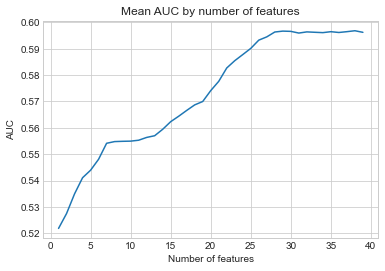

In [81]:
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.title('Mean AUC by number of features')
plt.ylabel('AUC')
plt.xlabel('Number of features')

In [82]:
cust_df.groupby('Churn').count()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
Churn,,,,,,,,,,,,,,,,,,,,,
0,34698,34698,34698,34698,34698,34698,34698,34698,34698,34698,...,34698,34698,34698,34698,34698,34698,34698,34698,34698,34698
1,34698,34698,34698,34698,34698,34698,34698,34698,34698,34698,...,34698,34698,34698,34698,34698,34698,34698,34698,34698,34698


## Apply nested cross validation to create model

The next step is to use nested cross validation to optimize the model hyperparameter and test the model performance. The model is constructed using the features selected. 

As a first step, construct the inside and outside folds for the nested cross validation by running the code in the cell below. 

In [83]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [84]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
# param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

## Define the logistic regression model
logistic_mod = linear_model.LogisticRegression() #class_weight = {0:0.45, 1:0.55}

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

## Fit the cross validated grid search over the data 
# clf.fit(Features_reduced_scale, Labels)
# clf.fit(Features_reduced_combined_scale, Labels)

clf.fit(X_combine_array, Labels)


## And print the best parameter value
clf.best_estimator_.C

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc')

1

Performance metrics by parameter
Parameter   Mean performance   STD performance
   0.001        0.59629            0.00361
   0.010        0.59642            0.00406
   0.100        0.59625            0.00398
   1.000        0.59661            0.00388
  10.000        0.59642            0.00401
 100.000        0.59653            0.00417
1000.000        0.59636            0.00410


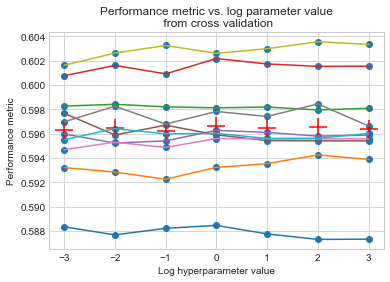

In [85]:
def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.3f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid)  

In [86]:
# Skipped this cell because it is taking too long to run, below is the results of previously run

# nr.seed(498)
# cv_estimate = ms.cross_val_score(clf, X_array, Labels, 
#                                  cv = outside) # Use the outside folds
# print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

# print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
# print('Outcomes by cv fold')
# for i, x in enumerate(cv_estimate):
#     print('Fold %2d    %4.3f' % (i+1, x))

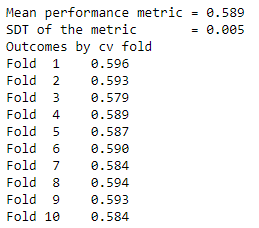

# Train_test_split to train and test dataset

In [87]:
#Train - test split to train and test model accuracy
# X = Features_reduced
# X_scale = Features_reduced_scale
# y = Labels
X_train, X_test, y_train, y_test = train_test_split(X_combine, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Create dummy variables for all categorical variables
# X = pd.get_dummies(X)
# X_train = pd.get_dummies(X_train) # 60 columns to 826 columns
# X_test = pd.get_dummies(X_test) # 60 columns to 730 columns



(55516, 41)
(13880, 41)
(55516,)
(13880,)


In [88]:
Features_reduced_scale

array([[-0.21800416, -0.53066104, -0.69598121, ...,  0.97442604,
         0.18107647,  1.10735185],
       [-0.59781516, -0.34736392, -0.60804843, ...,  0.97442604,
         0.18107647, -1.45106171],
       [-0.52940049, -0.75181299, -0.69598121, ..., -1.25555724,
         0.18107647, -1.45106171],
       ...,
       [-0.62362283, -0.87533931, -1.26754431, ...,  0.97442604,
         0.18107647, -0.17185493],
       [ 0.35195581,  0.44161062,  1.06267445, ...,  0.97442604,
        -1.58145708,  1.10735185],
       [ 0.916316  ,  2.47581014,  1.72217033, ...,  0.97442604,
         0.18107647, -1.45106171]])

In [89]:
X_train

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RespondsToMailOffers,HasCreditCard,IncomeGroup,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
31807,28.36,165.0,25.0,0.00,7.0,0.0,-165.0,-28.4,1.0,1.3,...,0,1,5,4,1,2,0,1.000000,0.881523,0.042424
10368,143.50,757.0,46.0,0.74,237.0,0.0,-223.0,-89.5,9.3,11.3,...,1,1,1,4,2,2,2,0.500000,0.320557,0.313078
35563,105.12,951.0,47.0,0.00,34.0,40.2,76.0,43.1,7.3,7.0,...,1,1,5,3,2,2,0,1.000000,0.447108,0.035752
66855,53.71,380.0,35.0,1.24,44.0,0.0,45.0,12.5,3.7,0.0,...,1,0,9,3,1,2,0,0.500000,0.651648,0.115789
61686,10.00,106.0,10.0,0.00,0.0,0.0,-76.0,0.0,0.0,0.0,...,0,1,7,1,2,2,1,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,20.00,4.0,20.0,0.00,0.0,0.0,5.0,0.0,0.3,0.0,...,1,1,9,1,4,2,1,1.000000,1.000000,0.000000
45891,32.56,162.0,30.0,0.99,0.0,1.6,-38.0,0.2,8.0,2.3,...,0,1,7,2,1,2,0,1.000000,0.921376,0.000000
42613,54.99,675.0,45.0,0.74,22.0,0.0,-44.0,-0.2,4.0,2.7,...,0,1,5,5,1,2,0,1.000000,0.818331,0.032593
43567,16.15,338.0,10.0,0.00,10.0,0.0,478.0,16.4,0.3,3.0,...,0,1,4,3,3,2,0,0.666667,0.619195,0.029586


In [90]:
X_test

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RespondsToMailOffers,HasCreditCard,IncomeGroup,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
32056,36.25,39.0,25.0,0.00,18.0,0.0,-18.0,-9.2,1.3,0.0,...,0,0,0,1,4,2,2,1.0,0.689655,0.461538
4088,55.66,398.0,30.0,0.25,72.0,0.0,36.0,20.5,0.7,2.3,...,0,0,0,4,2,2,2,1.0,0.538987,0.180905
6770,90.79,597.0,92.0,2.48,0.0,1.8,-127.0,-9.8,0.0,0.0,...,1,1,6,2,2,2,1,1.0,1.013327,0.000000
39968,93.57,862.0,50.0,2.97,77.0,17.5,62.0,22.8,9.0,0.3,...,0,1,6,1,1,0,1,1.0,0.534359,0.089327
37311,68.15,391.0,50.0,3.96,18.0,9.7,-113.0,-11.2,1.0,0.0,...,0,0,0,1,1,2,2,1.0,0.733676,0.046036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37351,59.63,444.0,60.0,0.25,0.0,0.2,-57.0,-8.9,12.3,33.0,...,0,1,6,4,4,0,1,1.0,1.006205,0.000000
10489,88.97,625.0,74.0,5.69,3.0,0.3,-246.0,-1.0,8.7,1.0,...,0,1,8,3,4,2,0,1.0,0.831741,0.004800
14460,44.55,444.0,32.0,0.00,0.0,11.8,31.0,31.1,2.0,13.0,...,1,1,8,2,2,2,1,1.0,0.718294,0.000000
42591,10.09,6.0,10.0,0.00,0.0,0.0,3.0,-0.1,0.3,0.0,...,1,1,7,1,4,2,1,1.0,0.991080,0.000000


In [91]:
y

0        1
1        1
2        1
3        1
4        1
        ..
69391    0
69392    0
69393    0
69394    0
69395    0
Name: Churn, Length: 69396, dtype: int64

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [92]:
# Function to seach for Hyperparamaters using GridSearchCV for model optimization 

def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()
    
    means = gd_model.cv_results_['mean_test_score']
    stds = gd_model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gd_model.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 7), round(std * 2, 3), params))
    
    print('\nBEST PARAMS: {}\n'.format(gd_model.best_params_))
    
    return param_dict

In [93]:
# function to show ranking of importance feature for model used
def print_impt_feat(test_model, color):
    model = test_model
    feat_imp = model.best_estimator_.feature_importances_
    indices = np.argsort(feat_imp)
    
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
    plt.barh(range(len(indices)), feat_imp[indices], color=color, align='center')
    plt.show()


In [94]:
# function for classification model to generate classification report and confusion matrix

def cls_report_confusion_matrix(test_model):
    model = test_model
    y_pred_dt = model.predict(X_train)
    print(classification_report(y_train_cat, y_pred_dt))
    cm = confusion_matrix(y_train_cat, y_pred_dt)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cv_dt_clf.classes_)
    disp.plot(cmap= 'YlOrBr')

In [95]:
def LogisticRegression_model(X_train_scaled, y_train, X_test_scaled, C, penalty, solver, class_weight, cv):

    #type your code to build logistic regression model on training data setGridSearchCV
    regressor = LogisticRegression(C= C, penalty= penalty, solver= solver, class_weight= class_weight)
    regressor.fit(X_train_scaled, y_train)

    print('Best C: {} / Best Solver: {} / Best Penalty: {} / Best Class Weight: {}'.format(
        regressor.C, regressor.solver, regressor.penalty, regressor.class_weight))
    
    y_train_pred = regressor.predict(X_train_scaled)
    y_test_pred = regressor.predict(X_test_scaled)

    scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10)
    print(f'\nMean CV accuracy: {np.mean(scores)}')
    print(f'Std CV accuracy: {np.std(scores)}')
    sns.distplot(scores)
    print('')

    print('Train accuracy:', regressor.score(X_train_scaled, y_train))
    print('Test accuracy:', regressor.score(X_test_scaled, y_test))
    print('')

    accuracy = round(accuracy_score(y_train_pred, y_train), 6)
    precision = round(precision_score(y_train_pred, y_train), 6)
    recall = round(recall_score(y_train_pred, y_train), 6)  
    
    print('Accuracy: {} / Precision: {} / Recall: {}'.format(accuracy, precision, recall))
    return regressor, y_train_pred, y_test_pred

In [96]:
def confusion_matrix_result(regressor, y_train, y_train_pred):    
    print(classification_report(y_train, y_train_pred))
    cm = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=regressor.classes_)
    disp.plot(cmap= 'YlOrBr') 

In [97]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [98]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()  

In [99]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

# Run Logistic Regression (without hyperparameter tuning)

Best C: 1.0 / Best Solver: lbfgs / Best Penalty: l2 / Best Class Weight: None

Mean CV accuracy: 0.5773831771880031
Std CV accuracy: 0.009056802166549442

Train accuracy: 0.5786620073492327
Test accuracy: 0.5824207492795389

Accuracy: 0.578662 / Precision: 0.597276 / Recall: 0.578314


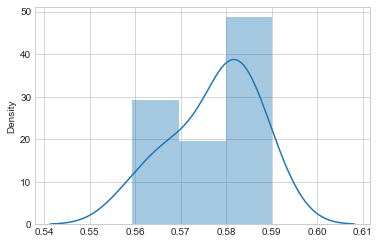

In [100]:
# Get default settings for basis LogisticRegression() model

logRer = LogisticRegression(max_iter=1000) 
# logRer.get_params()

C = logRer.get_params()['C']
class_weight = logRer.get_params()['class_weight']
penalty = logRer.get_params()['penalty']
solver = logRer.get_params()['solver']
cv = 10

regressor, y_train_pred, y_test_pred = LogisticRegression_model(X_train_scaled, y_train, X_test_scaled, C, penalty, solver, class_weight, cv)

              precision    recall  f1-score   support

           0       0.58      0.56      0.57     27611
           1       0.58      0.60      0.59     27905

    accuracy                           0.58     55516
   macro avg       0.58      0.58      0.58     55516
weighted avg       0.58      0.58      0.58     55516



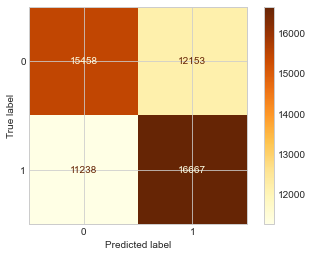

In [101]:
confusion_matrix_result(regressor, y_train, y_train_pred)

In [102]:
print('logistic_mod.intercept_ = ', regressor.intercept_)
print('\nlogistic_mod.coef_ =\n', regressor.coef_)

probabilities = regressor.predict_proba(X_test)
print('\nTop 15 rows of probabilities: \n', probabilities[:15,:])

logistic_mod.intercept_ =  [0.01048477]

logistic_mod.coef_ =
 [[-0.03282895 -0.14893049  0.02046656 -0.01258926  0.12952425  0.01883844
  -0.15097082  0.10602232  0.14212221  0.13806641  0.04552951 -0.0474342
  -0.03867676  0.01770469  0.01102414 -0.01313613 -0.08130163 -0.00783089
  -0.14479866 -0.00944282  0.00097218 -0.19872948  0.1139768  -0.08556991
   0.10829382  0.02935209  0.33668234 -0.08794636 -0.00658156  0.05755331
  -0.04051156 -0.0277928   0.07035179 -0.03410198 -0.0940415   0.02127766
   0.00646563  0.05962216 -0.03928725 -0.10382429  0.00603308]]

Top 15 rows of probabilities: 
 [[0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.21565038e-14 1.00000000e+00]
 [1.00000000e+00 7.87113993e-28]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.51150322e-02 9.14884968e-01]
 [1.00000000e+00 6.25339276e-33]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.14999858e-70]
 [9.66636936e-01 3.33630641e-02]
 [0.00000000e+00 1.00000000e+00]
 

notice that model coefficients **(logistic_mod.coef_)** look just as they would for an regression model. This is expected as previously explained. Additionally, nearly all the coefficients have the same magnitude indicating this model is likely to be overfit, given the number of features. 

The logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). The cell below compute and display a sample of these class probabilities for the test feature set. 

For the Top 15 rows of possibilities: first column is the probability of a score of $0$ and the second column is the probability of a score of $1$. Notice that for most, but not all cases, the probability of a score of $1$ is higher than $0$.

These scores will be compared with the threshold. It gives p and 1-p

## Score and evaluate the classification model

<font size=4>Now that the class probabilities have been computed these values must be transformed into actual class scores. Recall that the log likelihoods for two-class logistic regression are computed by applying the sigmoid or logistic transformation to the output of the linear model. The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. A few examples along with the known labels are then displayed.

<font color=red>We are going to score the model using the threshold

In [103]:
scores = score_model(probabilities, 0.5)
print(np.array(scores[:50]))
print(Labels[:50]) 

# print(y_test[:15])
# test labels -> Reshape the Label array, where:
# Labels = y.values.reshape(y.shape[0],)

[1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 0 1 0 1 0 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


From the score model above, some of the positive ($1$) predictions agree with the test labels in the second row, but several do not.

The code in the cell below implements a function that computes and displays the forementioned classifier performance metrics. The code metrics are computed using the `precision_recall_fscore_support` and `accuracy_score` functions from the `metrics` package of scikit-learn. The confusion matrix is computed using the `confusion_matrix` function from this same package. Execute this code and examine the results for the logistic regression model. 

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2563              4524
Actual negative      1734              5059

Accuracy  0.55
 
           Positive      Negative
Num case     7087          6793
Precision    0.60          0.53
Recall       0.36          0.74
F1           0.45          0.62


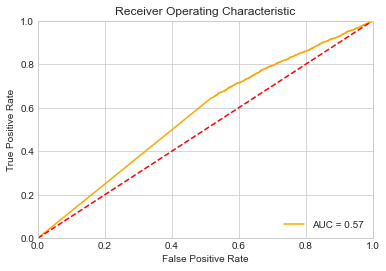

In [104]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)     
plot_auc(y_test, probabilities)   

Examine these Confusion matrix results:
1. The confusion matrix shows the following characteristics:
    * a) positive cases are have 2600++ correct and 4400++ incorrect classified
    * b) negative cases are have 4900++ correct vs. 1800++ incorrect classified  
2. The overall accuracy is 0.55 as observed and the positive cases are poorly classified
3. The class is **imbalance** initally when we studied the data. We then perform upsampling on class_1 so we have about equivalent number of case for class_0 (6793) and class_1 (7087) here.
4. Positive cases: precision, recall and F1 score are rather poor
5. Negative cases: precision and F1 score are rather poor, only its recall is reasonably well. 
6. The ROC curve is above the diagonal red-dotted line and the AUC is approximately 0.55.

Note that it is these positive cases that are of greatest importance to our problem here. 


## Hyperparameter tuning using GridSeachCV

In [105]:
# Tune hyperparameter
## Define the dictionary for the grid search and the model object to search on
param_grid = dict(penalty = ['l2'],
                  C = [0.1, 1, 10],
                  solver = ['newton-cg', 'lbfgs'],
                 class_weight = [{0:0.45, 1:0.55}, {0:0.55, 1:0.45}, None])               

## Perform the grid search over the parameters
log_clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid = param_grid, cv = 5, verbose=3)

## Fit the cross validated grid search over the data 
log_clf = log_clf.fit(X_train_scaled, y_train)

## And print the best parameter value
# log_clf.best_estimator_.C

#print score
print('\nRegressor train score %.3f\nRegressor test score: %.3f' % (
    log_clf.score(X_train_scaled,y_train), log_clf.score(X_test_scaled, y_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=newton-cg;, score=0.566 total time=   0.5s
[CV 2/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=newton-cg;, score=0.572 total time=   0.5s
[CV 3/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=newton-cg;, score=0.559 total time=   0.3s
[CV 4/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=newton-cg;, score=0.561 total time=   0.5s
[CV 5/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=newton-cg;, score=0.571 total time=   0.4s
[CV 1/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=lbfgs;, score=0.566 total time=   0.2s
[CV 2/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=lbfgs;, score=0.572 total time=   0.2s
[CV 3/5] END C=0.1, class_weight={0: 0.45, 1: 0.55}, penalty=l2, solver=lbfgs;, score=0.559 total time=   0.2s
[CV 4/5] END C=0.1, class_weigh

[CV 2/5] END C=10, class_weight={0: 0.55, 1: 0.45}, penalty=l2, solver=lbfgs;, score=0.565 total time=   0.2s
[CV 3/5] END C=10, class_weight={0: 0.55, 1: 0.45}, penalty=l2, solver=lbfgs;, score=0.560 total time=   0.2s
[CV 4/5] END C=10, class_weight={0: 0.55, 1: 0.45}, penalty=l2, solver=lbfgs;, score=0.558 total time=   0.2s
[CV 5/5] END C=10, class_weight={0: 0.55, 1: 0.45}, penalty=l2, solver=lbfgs;, score=0.567 total time=   0.3s
[CV 1/5] END C=10, class_weight=None, penalty=l2, solver=newton-cg;, score=0.572 total time=   0.6s
[CV 2/5] END C=10, class_weight=None, penalty=l2, solver=newton-cg;, score=0.585 total time=   0.5s
[CV 3/5] END C=10, class_weight=None, penalty=l2, solver=newton-cg;, score=0.571 total time=   0.5s
[CV 4/5] END C=10, class_weight=None, penalty=l2, solver=newton-cg;, score=0.571 total time=   0.6s
[CV 5/5] END C=10, class_weight=None, penalty=l2, solver=newton-cg;, score=0.587 total time=   0.5s
[CV 1/5] END C=10, class_weight=None, penalty=l2, solver=lbf

In [106]:
param_dict = print_best_params(log_clf)


*** LogisticRegression Best Parameters ***
C: 0.1
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 1000
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False

0.565999 (+/-0.01) for {'C': 0.1, 'class_weight': {0: 0.45, 1: 0.55}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.566035 (+/-0.01) for {'C': 0.1, 'class_weight': {0: 0.45, 1: 0.55}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.5618021 (+/-0.007) for {'C': 0.1, 'class_weight': {0: 0.55, 1: 0.45}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.5618381 (+/-0.007) for {'C': 0.1, 'class_weight': {0: 0.55, 1: 0.45}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.5774372 (+/-0.014) for {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
0.5774552 (+/-0.014) for {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
0.5657648 (+/-0.01) for {'C': 1, 'class_weight': {0: 0.45, 1: 0.55}, 'penalty': 'l2', 'solver': 'newt

Best C: 0.1 / Best Solver: lbfgs / Best Penalty: l2 / Best Class Weight: None

Mean CV accuracy: 0.5775633086854564
Std CV accuracy: 0.00900710396867677

Train accuracy: 0.5784818790979177
Test accuracy: 0.5820605187319885

Accuracy: 0.578482 / Precision: 0.597133 / Recall: 0.578135


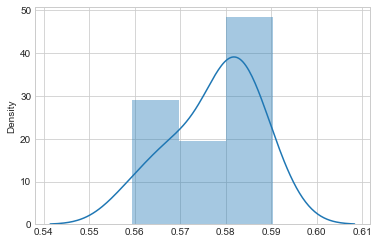

In [107]:
# Get the best hyperameters from GridSearchCV and feed them into our LogisticRegression model 
C = param_dict['C']
class_weight = param_dict['class_weight']
penalty = param_dict['penalty']
solver = param_dict['solver']
cv = 5

regressor, y_train_pred, y_test_pred = LogisticRegression_model(X_train_scaled, y_train, X_test_scaled, C, penalty, solver, class_weight, cv)

              precision    recall  f1-score   support

           0       0.58      0.56      0.57     27611
           1       0.58      0.60      0.59     27905

    accuracy                           0.58     55516
   macro avg       0.58      0.58      0.58     55516
weighted avg       0.58      0.58      0.58     55516



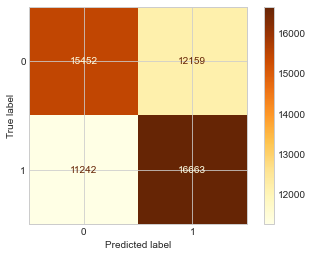

In [108]:
confusion_matrix_result(regressor, y_train, y_train_pred)

In [109]:
print('logistic_mod.intercept_ = ', regressor.intercept_)
print('\nlogistic_mod.coef_ =\n', regressor.coef_)

probabilities = regressor.predict_proba(X_test)
print('\nTop 15 rows of probabilities: \n', probabilities[:15,:])

logistic_mod.intercept_ =  [0.01049958]

logistic_mod.coef_ =
 [[-0.03175536 -0.14847569  0.01958968 -0.01256967  0.12857123  0.0187061
  -0.15062639  0.10574486  0.11594097  0.10656214  0.04541119 -0.04747845
  -0.03858354  0.01768883  0.01100234 -0.01307537 -0.08088815 -0.00791934
  -0.10049798 -0.00943061  0.00092238 -0.19782123  0.11026447 -0.0824089
   0.10776287  0.02905522  0.33578055 -0.08778819 -0.00665032  0.05747682
  -0.04082235 -0.02743476  0.07013376 -0.03397972 -0.09392482  0.02125194
   0.00647553  0.05958665 -0.04147401 -0.10327999  0.00626954]]

Top 15 rows of probabilities: 
 [[0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.45989945e-14 1.00000000e+00]
 [1.00000000e+00 1.19686779e-27]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [6.55792422e-02 9.34420758e-01]
 [1.00000000e+00 1.04223337e-32]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.50588312e-70]
 [9.46706911e-01 5.32930886e-02]
 [0.00000000e+00 1.00000000e+00]
 [

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2556              4531
Actual negative      1724              5069

Accuracy  0.55
 
           Positive      Negative
Num case     7087          6793
Precision    0.60          0.53
Recall       0.36          0.75
F1           0.45          0.62


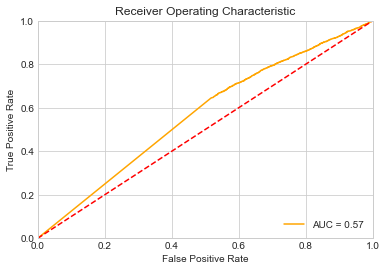

In [110]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)     
plot_auc(y_test, probabilities) 

Conclusion for Logistic Regressor:
    


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


# Run Random Forest classifier (without hyperparameter tuning)

In [111]:
def RandomForestClassifier_model(X_train_scaled, y_train, X_test_scaled, criterion, n_estimators, max_depth, max_features, cv):

    #type your code to build logistic regression model on training data setGridSearchCV
    classifier = RandomForestClassifier(criterion= criterion, n_estimators= n_estimators, max_depth= max_depth, max_features= max_features)
    classifier.fit(X_train_scaled, y_train)

    print('Best criterion: {} / Best n_estimators: {} / Best max_depth: {} / Best max_features: {} '.format(
        classifier.criterion, classifier.n_estimators, classifier.max_depth, classifier.max_features))
    
    y_train_pred = classifier.predict(X_train_scaled)
    y_test_pred = classifier.predict(X_test_scaled)

    scores = cross_val_score(classifier, X_train_scaled, y_train, cv=10)
    print(f'\nMean CV accuracy: {np.mean(scores)}')
    print(f'Std CV accuracy: {np.std(scores)}')
    sns.distplot(scores)
    print('')

    print('Train accuracy:', classifier.score(X_train_scaled, y_train))
    print('Test accuracy:', classifier.score(X_test_scaled, y_test))
    print('')

    accuracy = round(accuracy_score(y_train_pred, y_train), 6)
    precision = round(precision_score(y_train_pred, y_train), 6)
    recall = round(recall_score(y_train_pred, y_train), 6)  
    
    print('Accuracy: {} / Precision: {} / Recall: {}'.format(accuracy, precision, recall))
    return classifier, y_train_pred, y_test_pred

In [112]:
# max_depth can only go up to 18, else over-fit, 
# however, try to keep max-depth = 14 (because hold-out data have only 20000 rows)
# There is a total of 55516 rows of data (train)
for i in range(8,21,1):
    print(i, 2**i)


8 256
9 512
10 1024
11 2048
12 4096
13 8192
14 16384
15 32768
16 65536
17 131072
18 262144
19 524288
20 1048576


Best criterion: gini / Best n_estimators: 10 / Best max_depth: 10 / Best max_features: auto 

Mean CV accuracy: 0.6650154488351918
Std CV accuracy: 0.006224028701477533

Train accuracy: 0.7178651199654154
Test accuracy: 0.6657060518731989

Accuracy: 0.717865 / Precision: 0.787242 / Recall: 0.693128


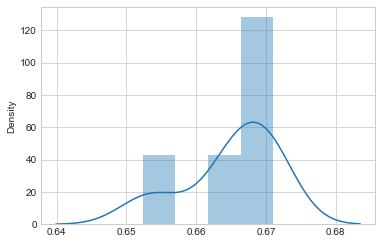

In [113]:
# Random settings for basis RandomForestClassifier() model

forest_clf = RandomForestClassifier(criterion = 'gini', n_estimators = 10, max_depth = 10)
forest_clf = forest_clf.fit(X_train_scaled, y_train)

criterion = forest_clf.get_params()['criterion']
n_estimators = forest_clf.get_params()['n_estimators']
max_depth = forest_clf.get_params()['max_depth']
max_features = forest_clf.get_params()['max_features']
cv = 5

classifier, y_train_pred, y_test_pred = RandomForestClassifier_model(X_train_scaled, y_train, X_test_scaled, criterion, n_estimators, max_depth, max_features, cv)
# RandomForestClassifier_model(X_train_scaled, y_train, X_test_scaled, criterion, n_estimators, max_depth, max_features, cv):

              precision    recall  f1-score   support

           0       0.75      0.65      0.70     27611
           1       0.69      0.79      0.74     27905

    accuracy                           0.72     55516
   macro avg       0.72      0.72      0.72     55516
weighted avg       0.72      0.72      0.72     55516



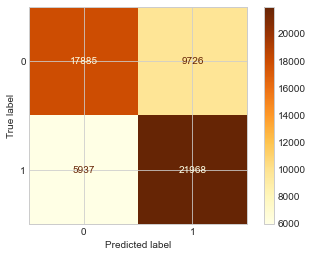

In [114]:
confusion_matrix_result(classifier, y_train, y_train_pred)

In [115]:
# Tune hyperparameter
## Define the dictionary for the grid search and the model object to search on

# class_weight = [{0:0.40, 1:0.60}, {0:0.45, 1:0.55}, {0:0.55, 1:0.45}, {0:0.6, 1:0.4}]

param_grid = dict(n_estimators = [12, 14],
                  max_depth= [12, 14],
                 criterion = ['gini', 'entropy'],
                 max_features = ['auto', 'sqrt', 'log2'])
                 

## Perform the grid search over the parameters
forest_clf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5, verbose=3)

## Fit the cross validated grid search over the data 
forest_clf = forest_clf.fit(X_train_scaled, y_train)

#print score
print('\nRandom forest train score %.3f\nRandom forest test score: %.3f' % (
    forest_clf.score(X_train_scaled,y_train), forest_clf.score(X_test_scaled, y_test)))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=12;, score=0.700 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=12;, score=0.699 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=12;, score=0.690 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=12;, score=0.698 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=12;, score=0.702 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=14;, score=0.701 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=14;, score=0.705 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=14;, score=0.699 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=12, max_fea

[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=12;, score=0.693 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=12;, score=0.697 total time=   1.7s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=14;, score=0.691 total time=   1.7s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=14;, score=0.696 total time=   1.8s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=14;, score=0.686 total time=   1.8s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=14;, score=0.694 total time=   1.8s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=14;, score=0.703 total time=   1.8s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=12;, score=0.688 total time=   1.3s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=12;, score

In [116]:
param_dict = print_best_params(forest_clf)


*** RandomForestClassifier Best Parameters ***
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 14
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 14
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False

0.6977988 (+/-0.009) for {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 12}
0.7025002 (+/-0.011) for {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 14}
0.7025903 (+/-0.01) for {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 12}
0.7028965 (+/-0.009) for {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 14}
0.6965559 (+/-0.008) for {'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 12}
0.7047878 (+/-0.009) for {'criterion': 'gini', 'max_dept

Best criterion: gini / Best n_estimators: 14 / Best max_depth: 14 / Best max_features: sqrt 

Mean CV accuracy: 0.751566980168695
Std CV accuracy: 0.005475950184418248

Train accuracy: 0.8794041357446502
Test accuracy: 0.7604466858789626

Accuracy: 0.879404 / Precision: 0.91489 / Recall: 0.855276


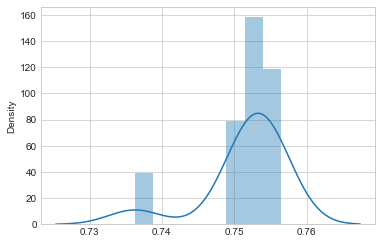

In [117]:
# Get the best hyperameters from GridSearchCV and feed them into our LogisticRegression model 


# forest_clf = RandomForestClassifier(criterion = 'gini', n_estimators = 2)

criterion = param_dict['criterion']
n_estimators = param_dict['n_estimators']
max_depth = param_dict['max_depth']
max_features = param_dict['max_features']
cv = 5

classifier, y_train_pred, y_test_pred = RandomForestClassifier_model(X_train_scaled, y_train, X_test_scaled, criterion, n_estimators, max_depth, max_features, cv)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     27611
           1       0.86      0.91      0.88     27905

    accuracy                           0.88     55516
   macro avg       0.88      0.88      0.88     55516
weighted avg       0.88      0.88      0.88     55516



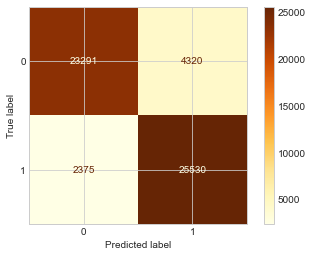

In [118]:
confusion_matrix_result(classifier, y_train, y_train_pred)

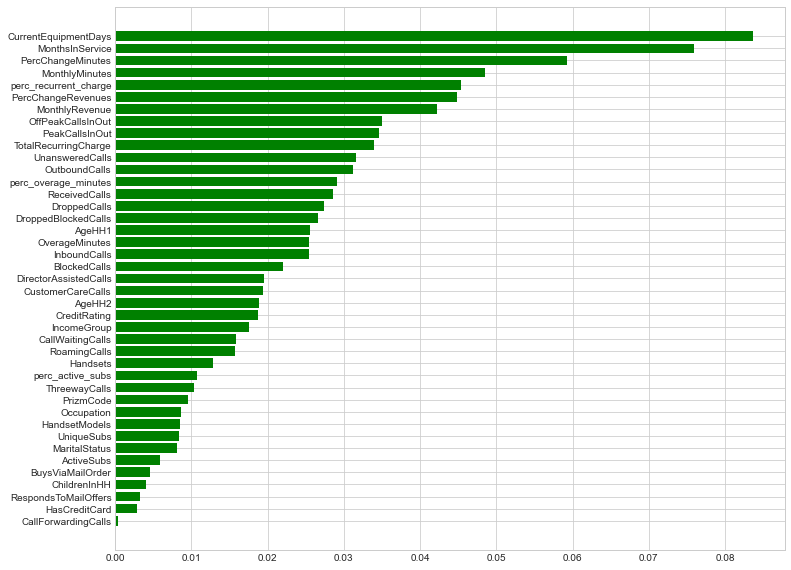

In [119]:
# This function prints the order of the most importance features from GridSearchCV
print_impt_feat(forest_clf, 'g')

In [120]:
# final model chosen to use for predicting hold out data (best performance)
model = classifier.fit(X_train_scaled, y_train)

In [121]:
model

RandomForestClassifier(max_depth=14, max_features='sqrt', n_estimators=14)

In [122]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix



<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

### Q4.3 Identify most important features impacting churn

In [123]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

# pd.Series(model.feature_importances_, index=X_train.columns)
feat_importance = pd.Series(classifier.feature_importances_, index=X_train.columns)
feat_importance.nlargest(20).sort_values(ascending=False)

CurrentEquipmentDays     0.086862
MonthsInService          0.070864
PercChangeMinutes        0.056126
MonthlyMinutes           0.050201
perc_recurrent_charge    0.045495
PercChangeRevenues       0.043460
MonthlyRevenue           0.043151
TotalRecurringCharge     0.033533
PeakCallsInOut           0.032948
ReceivedCalls            0.032731
OffPeakCallsInOut        0.032695
OutboundCalls            0.030261
UnansweredCalls          0.029846
perc_overage_minutes     0.028588
AgeHH1                   0.028442
DroppedBlockedCalls      0.028113
OverageMinutes           0.026375
InboundCalls             0.024970
DroppedCalls             0.024483
BlockedCalls             0.022140
dtype: float64

<AxesSubplot:>

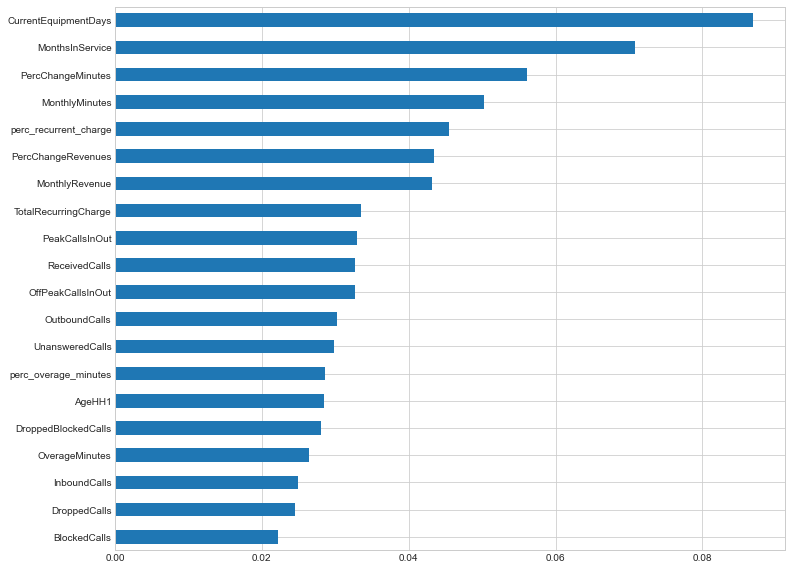

In [124]:
# top 20 important predictor features impacting churn 
# setting the dimensions of the plot

fig, ax = plt.subplots(figsize=(12, 10))
feat_importance.nlargest(20).sort_values(ascending=True).plot(kind='barh')


## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [125]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

cust_df_HoldOut = pd.read_csv("Mini_project_3_Hold_Out_Data2.csv")
cust_df_HoldOut



,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,...,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [126]:
cust_df_HoldOut = clean_round1(cust_df_HoldOut)
cust_df_HoldOut

Columns with missing values percentage > 5% : Churn


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,3399818,NaN,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,3,No,0,30,No,3-Good,Other,Other,Yes
19524,3399826,NaN,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,...,0,6,No,0,Unknown,No,1-Highest,Suburban,Professional,No
19525,3399854,NaN,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,...,0,6,No,0,150,No,4-Medium,Other,Other,Yes
19526,3399862,NaN,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,...,0,6,No,1,30,No,3-Good,Other,Professional,No


In [127]:
# total 15 features with categories: Yes and No
cust_cat_HoldOut = cust_df_HoldOut[['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
                    'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel',
                    'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
                    'MadeCallToRetentionTeam']]
cust_cat_HoldOut

# Run the yes_no_map function
# yes_no_map(cust_cat)

yes_no_num = {'Yes': 1, 'No': 0}

for i in cust_cat.columns:

    cust_df_HoldOut[i] = cust_df_HoldOut[i].map(yes_no_num)
        

cust_df_HoldOut[['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
                    'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel',
                    'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
                    'MadeCallToRetentionTeam']]

cust_df_HoldOut

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam
0,No,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,Yes,No,No
1,No,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
3,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No
4,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,Yes,Yes,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No
19524,No,No,No,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
19525,Yes,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
19526,No,No,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No


,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam
0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,1,1,1,1,0,0,1,0,1,0,0
4,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0
19524,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
19525,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0
19526,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,0,1,150,0,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,0,2,80,0,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,0,3,10,0,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,0,1,200,0,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,0,0,10,0,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,3399818,NaN,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,3,0,0,30,0,3-Good,Other,Other,Yes
19524,3399826,NaN,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,...,0,6,0,0,Unknown,0,1-Highest,Suburban,Professional,No
19525,3399854,NaN,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,...,0,6,0,0,150,0,4-Medium,Other,Other,Yes
19526,3399862,NaN,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,...,0,6,0,1,30,0,3-Good,Other,Professional,No


In [128]:
cust_df_HoldOut

# Map other features with categorical data

CreditRating_num = {'1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4, '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7}
cust_df_HoldOut['CreditRating'] = cust_df_HoldOut['CreditRating'].map(CreditRating_num)

PrizmCode_num = {'Suburban': 1, 'Town': 2, 'Rural': 3, 'Other': 4}
cust_df_HoldOut['PrizmCode'] = cust_df_HoldOut['PrizmCode'].map(PrizmCode_num)

known_unknown_num = {'Known': 1, 'Unknown': 0}
cust_df_HoldOut['Homeownership'] = cust_df_HoldOut['Homeownership'].map(known_unknown_num)

Occupation_num = {'Professional': 0, 'Crafts': 1, 'Other': 2, 'Self': 3, 'Retired': 4, 'Homemaker': 5, 'Clerical': 6, 'Student': 7}
cust_df_HoldOut['Occupation'] = cust_df_HoldOut['Occupation'].map(Occupation_num)

Marital_num = {'Yes': 1, 'No': 0, 'Unknown': 2}
cust_df_HoldOut['MaritalStatus'] = cust_df_HoldOut['MaritalStatus'].map(Marital_num)

cust_df_HoldOut

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,0,1,150,0,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,0,2,80,0,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,0,3,10,0,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,0,1,200,0,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,0,0,10,0,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,3399818,NaN,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,3,0,0,30,0,3-Good,Other,Other,Yes
19524,3399826,NaN,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,...,0,6,0,0,Unknown,0,1-Highest,Suburban,Professional,No
19525,3399854,NaN,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,...,0,6,0,0,150,0,4-Medium,Other,Other,Yes
19526,3399862,NaN,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,...,0,6,0,1,30,0,3-Good,Other,Professional,No


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,0,1,150,0,5,4,2,0
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,0,2,80,0,1,4,0,0
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,0,3,10,0,3,1,1,1
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,0,1,200,0,1,4,2,0
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,0,0,10,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,3399818,NaN,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,3,0,0,30,0,3,4,2,1
19524,3399826,NaN,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,...,0,6,0,0,Unknown,0,1,1,0,0
19525,3399854,NaN,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,...,0,6,0,0,150,0,4,4,2,1
19526,3399862,NaN,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,...,0,6,0,1,30,0,3,4,0,0


In [129]:
# list of features that seem to be less informative/ repeated (might be removed)

lessRelated_feat_HoldOut = cust_df_HoldOut[['CustomerID', 'ServiceArea', 'HandsetPrice']]
lessRelated_feat_HoldOut

,CustomerID,ServiceArea,HandsetPrice
0,3000006,MILMIL414,150
1,3000018,NNYSYR315,80
2,3000034,MILMIL414,10
3,3000070,SLCSLC801,200
4,3000074,OKCTUL918,10
...,...,...,...
19523,3399818,LAXBUR818,30
19524,3399826,LAXANA714,Unknown
19525,3399854,LAXCOV626,150
19526,3399862,LAXSMN310,30


In [130]:
# Remove label (that we are going to predict)
X_HoldOut = cust_df_HoldOut.drop(['Churn'], axis=1)
X_HoldOut


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,5,0,1,150,0,5,4,2,0
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,6,0,2,80,0,1,4,0,0
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,4,0,3,10,0,3,1,1,1
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,4,0,1,200,0,1,4,2,0
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,3,0,0,10,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,3399818,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0,3,0,0,30,0,3,4,2,1
19524,3399826,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0,6,0,0,Unknown,0,1,1,0,0
19525,3399854,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,...,0,6,0,0,150,0,4,4,2,1
19526,3399862,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,...,0,6,0,1,30,0,3,4,0,0


In [131]:
# Drop features that have lesser impact
X_HoldOut.drop(lessRelated_feat_HoldOut, axis = 1, inplace = True)
X_HoldOut


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,...,1,0,5,0,1,0,5,4,2,0
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,...,0,0,6,0,2,0,1,4,0,0
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,...,0,0,4,0,3,0,3,1,1,1
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,...,1,0,4,0,1,0,1,4,2,0
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,...,1,0,3,0,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,3,0,0,0,3,4,2,1
19524,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,6,0,0,0,1,1,0,0
19525,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,0.3,...,0,0,6,0,0,0,4,4,2,1
19526,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,0.3,...,0,0,6,0,1,0,3,4,0,0


In [132]:
X_HoldOut, idx =create_features(X_HoldOut)
X_HoldOut

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,...,0,1,0,5,4,2,0,1.000000,0.643590,0.047619
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,...,0,2,0,1,4,0,0,1.000000,1.303639,0.000000
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,...,0,3,0,3,1,1,1,1.000000,0.513663,0.404235
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,...,0,1,0,1,4,2,0,0.666667,0.842933,0.104575
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,...,0,0,0,1,1,2,0,1.000000,0.904650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,3,4,2,1,1.000000,1.000000,0.000000
19524,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1.000000,1.000589,0.000000
19525,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,0.3,...,0,0,0,4,4,2,1,1.000000,0.717017,0.088319
19526,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,0.3,...,0,1,0,3,4,0,0,1.000000,1.013111,0.000000


In [133]:
feat_importance.index

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'HasCreditCard', 'IncomeGroup', 'CreditRating', 'PrizmCode',
       'Occupation', 'MaritalStatus', 'perc_active_subs',
       'perc_recurrent_charge', 'perc_overage_minutes'],
      dtype='object')

In [134]:
# Keep those features that we have used for RandomForest model training
X_HoldOut_feat_impt = X_HoldOut[feat_importance.index]
X_HoldOut_feat_impt

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RespondsToMailOffers,HasCreditCard,IncomeGroup,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,...,1,1,5,5,4,2,0,1.000000,0.643590,0.047619
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,...,0,1,6,1,4,0,0,1.000000,1.303639,0.000000
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,...,0,0,4,3,1,1,1,1.000000,0.513663,0.404235
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,...,1,1,4,1,4,2,0,0.666667,0.842933,0.104575
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,...,1,1,3,1,1,2,0,1.000000,0.904650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,3,3,4,2,1,1.000000,1.000000,0.000000
19524,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,6,1,1,0,0,1.000000,1.000589,0.000000
19525,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,0.3,...,1,1,6,4,4,2,1,1.000000,0.717017,0.088319
19526,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,0.3,...,0,1,6,3,4,0,0,1.000000,1.013111,0.000000


In [135]:
X_HoldOut_feat_impt.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'HasCreditCard', 'IncomeGroup', 'CreditRating', 'PrizmCode',
       'Occupation', 'MaritalStatus', 'perc_active_subs',
       'perc_recurrent_charge', 'perc_overage_minutes'],
      dtype='object')

In [136]:
X_HoldOut_feat_impt_scaled = scaler.transform(X_HoldOut_feat_impt)

In [137]:
model

RandomForestClassifier(max_depth=14, max_features='sqrt', n_estimators=14)

In [138]:
#Use "predict" function on the transformend data using the best fitted model object

y_HoldOut_pred = model.predict(X_HoldOut_feat_impt_scaled)


Mean CV accuracy: 0.7597344721865478
Std CV accuracy: 0.04644184417626242


<AxesSubplot:ylabel='Density'>

Hold Out data (train) accuracy: 1.0


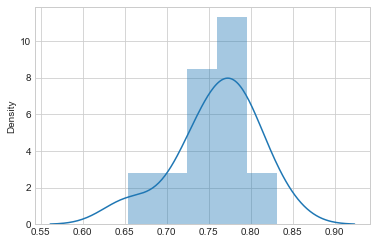

In [140]:
# Check the score of predicted hold out data
scores = cross_val_score(model, X_HoldOut_feat_impt_scaled, y_HoldOut_pred, cv=10)
print(f'\nMean CV accuracy: {np.mean(scores)}')
print(f'Std CV accuracy: {np.std(scores)}')
sns.distplot(scores)

print(f'Hold Out data (train) accuracy: {model.score(X_HoldOut_feat_impt_scaled, y_HoldOut_pred)}')

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [141]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   

In [142]:
elapsed = timeit.default_timer() - start_time
elapsed

605.4968186